In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4052,) <U51
features <type 'numpy.ndarray'> (4052, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 1.17


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1500, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [4]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm3/model-18',
                                 print_bleu=False, log_path='./log/')

Sampled Caption: a plate of food with a sandwich and a beer .


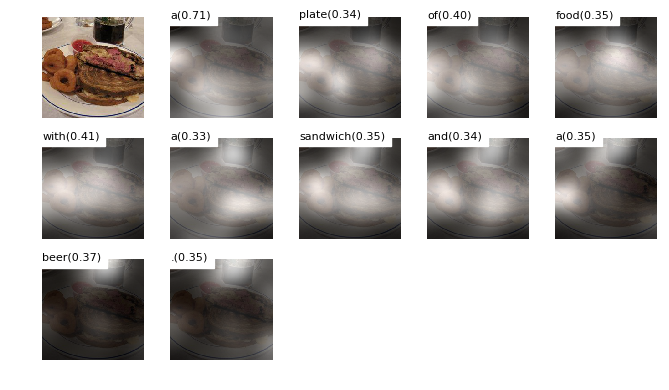

Sampled Caption: a man and a woman standing next to a red and white horse .


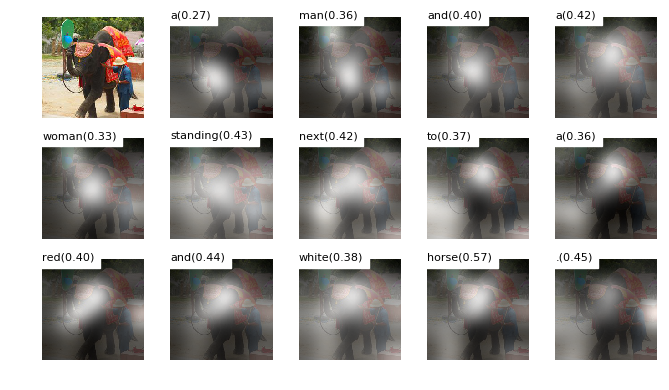

Sampled Caption: a kitchen with a refrigerator and a stove .


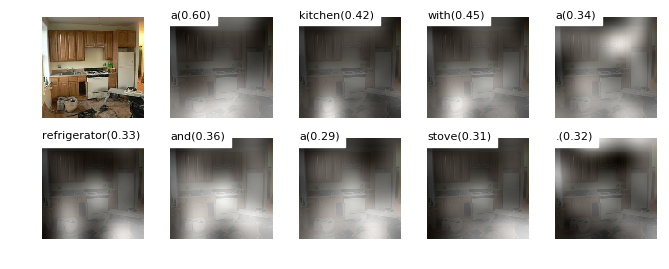

Sampled Caption: a woman in a red shirt is playing tennis .


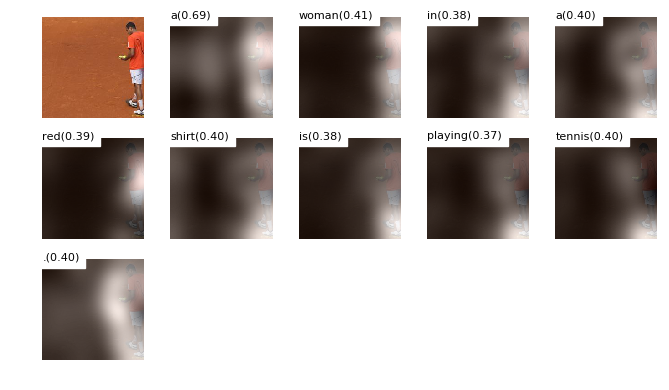

Sampled Caption: a group of people standing on a tennis court .


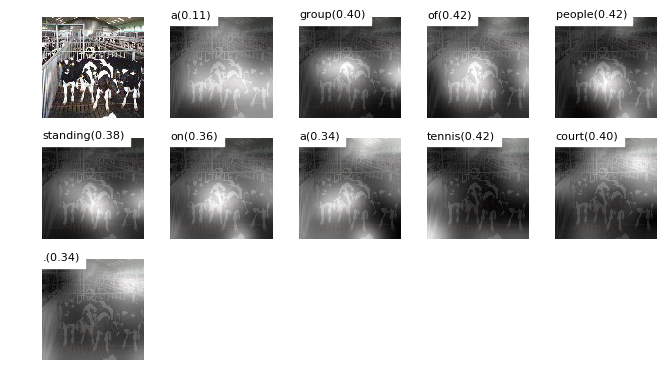

Sampled Caption: a laptop computer sitting on top of a wooden desk .


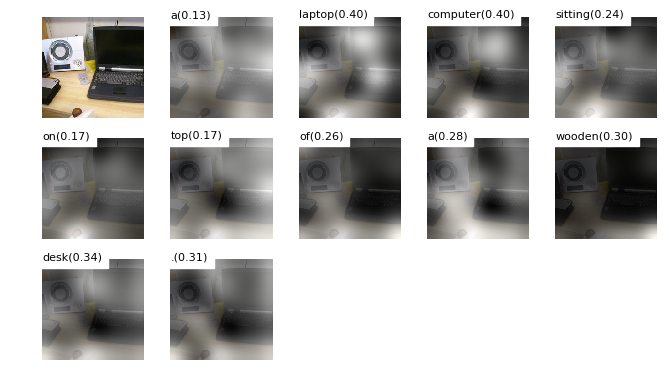

Sampled Caption: a pizza with a lot of vegetables on it .


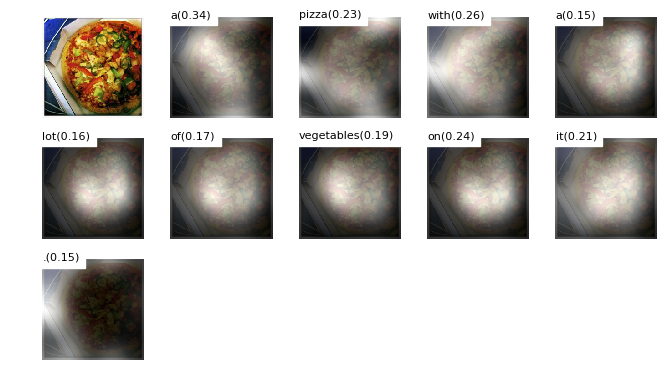

Sampled Caption: a boat is parked on the side of the road .


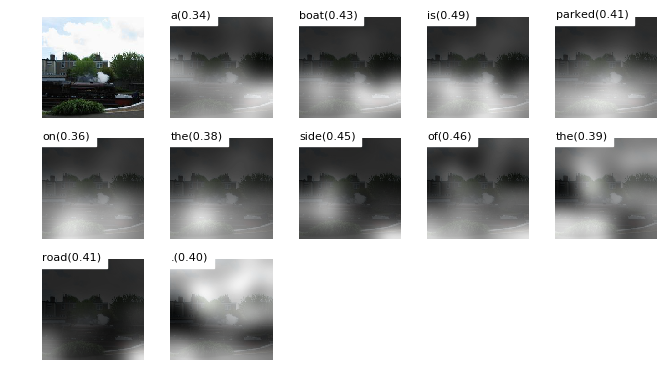

Sampled Caption: a pair of scissors sitting on top of a wooden table .


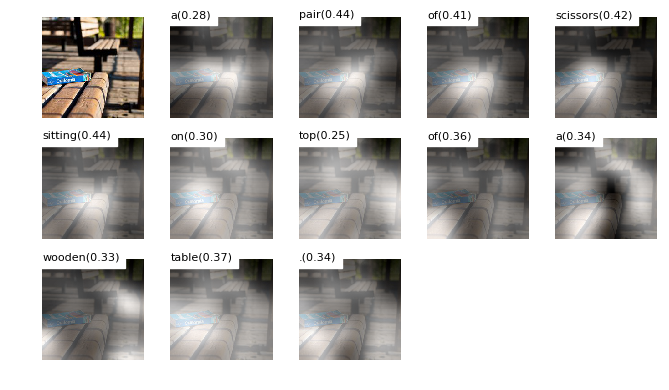

Sampled Caption: a sign that is on a pole on a street .


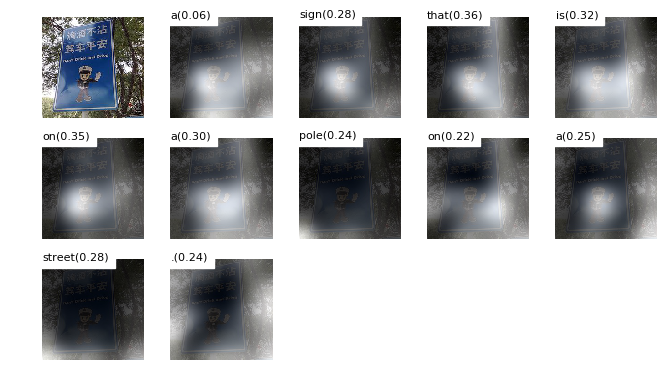

Saved ./data/val/val.candidate.captions.pkl..


In [5]:
solver.test(data, split='val')

In [6]:
test = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4048,) <U51
features <type 'numpy.ndarray'> (4048, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 19.43


Sampled Caption: a man is skiing down a snowy hill .


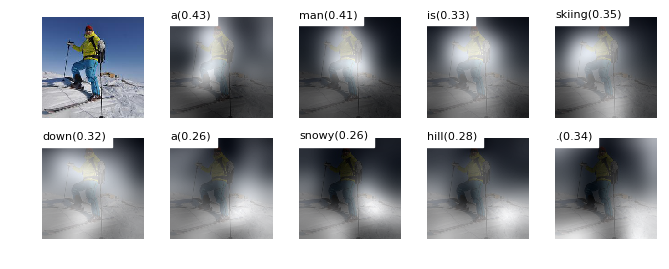

Sampled Caption: a man is standing next to a truck with a suitcase .


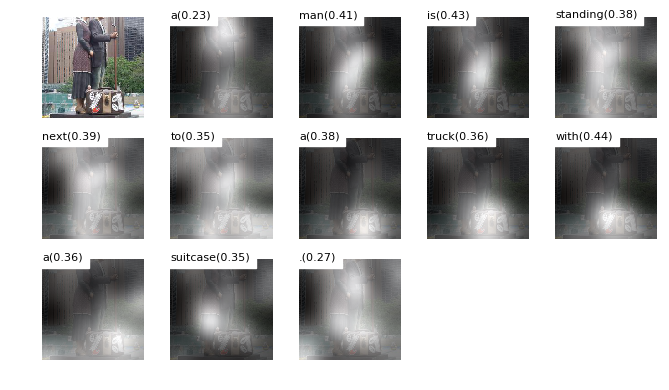

Sampled Caption: a plate of food with a sandwich and a bowl of fries .


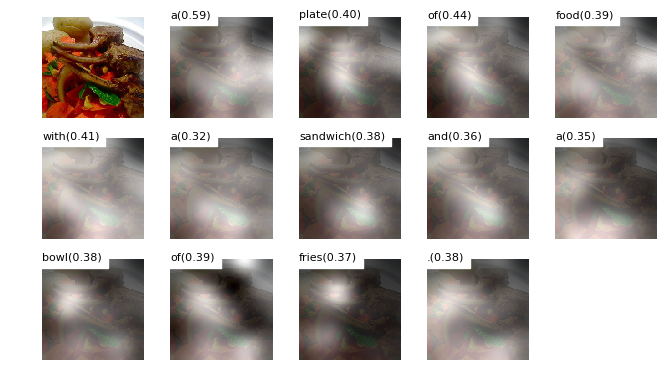

Sampled Caption: a large group of flowers in a garden .


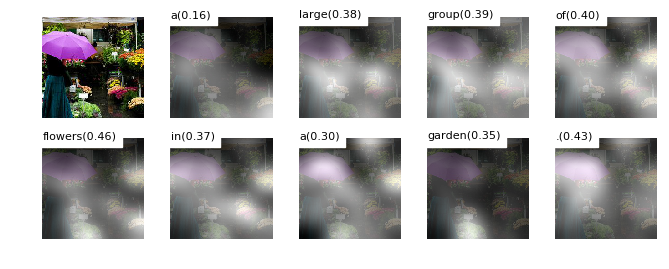

Sampled Caption: a man holding a broccoli bowl with a knife in his hand .


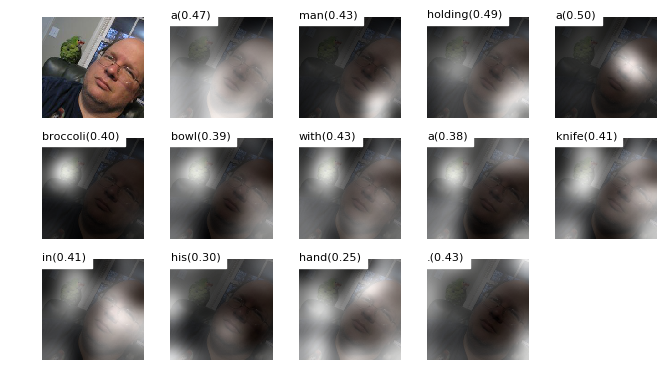

Sampled Caption: a group of people walking down a street with a bus on the side .


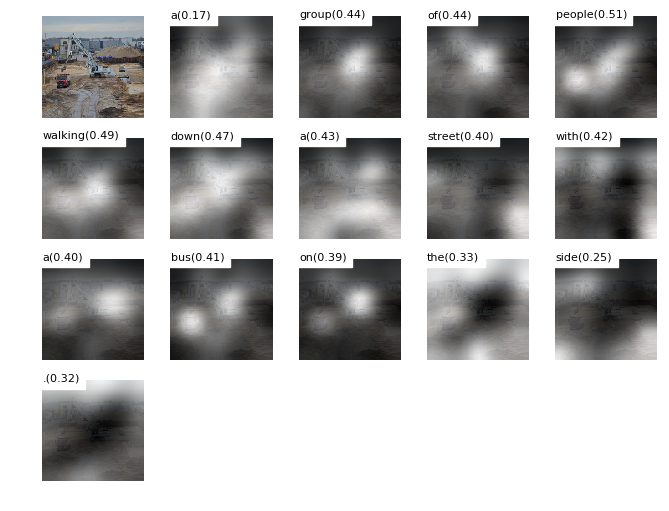

Sampled Caption: a plate of food with a sandwich and a salad .


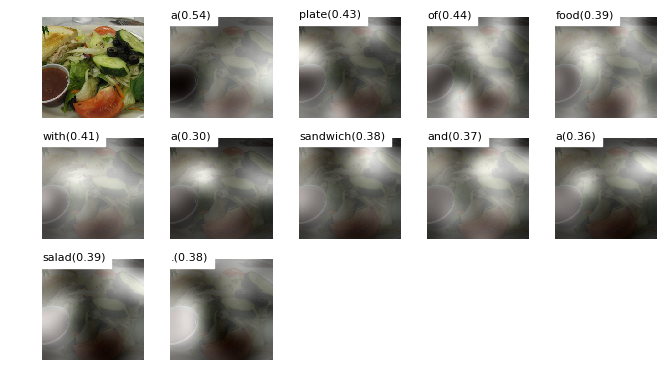

Sampled Caption: a bathroom with a toilet and a sink .


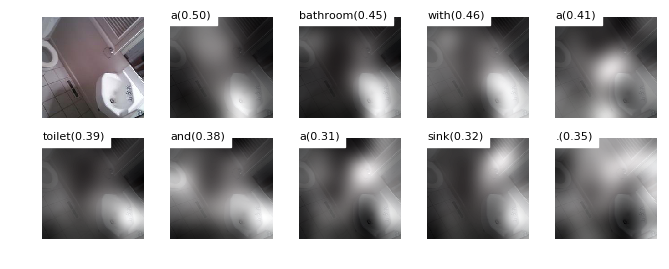

Sampled Caption: a stuffed bear sitting on a red chair .


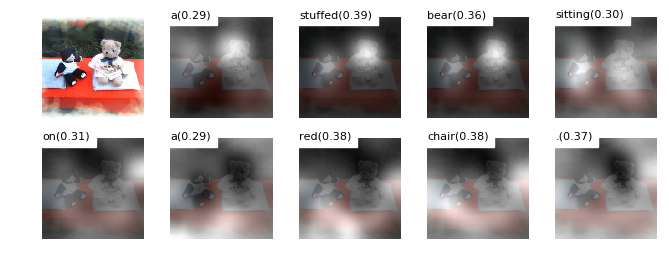

Sampled Caption: a plane flying through a cloudy sky .


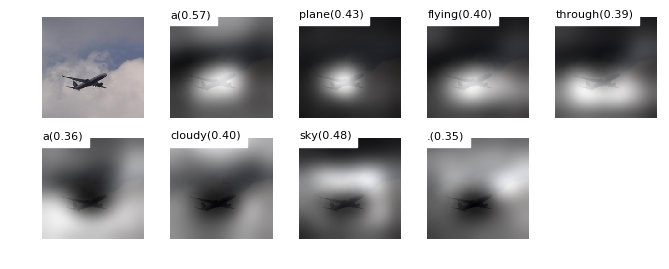

Saved ./data/test/test.candidate.captions.pkl..


In [7]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [8]:
evaluate(data_path='./data', split='val')

{'reflen': 43408, 'guess': [43989, 39937, 35885, 31833], 'testlen': 43989, 'correct': [29093, 12382, 5232, 2401]}
ratio: 1.01338462956
Bleu_1:	0.661369887927
Bleu_2:	0.452824472132
Bleu_3:	0.310364129211
Bleu_4:	0.217912572998
METEOR:	0.217213601321
ROUGE_L: 0.518324778652
CIDEr:	0.683173385807


In [9]:
evaluate(data_path='./data', split='test')

{'reflen': 43314, 'guess': [43979, 39931, 35883, 31835], 'testlen': 43979, 'correct': [28846, 12119, 5085, 2243]}
ratio: 1.01535300365
Bleu_1:	0.65590395416
Bleu_2:	0.446168005543
Bleu_3:	0.30441521379
Bleu_4:	0.211145033206
METEOR:	0.215652854828
ROUGE_L: 0.513925691333
CIDEr:	0.657087635567
